# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 

#### 1. a. State whether the values match the description given in the table above.


In [54]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Uploading data
df = pd.read_csv('fitness_class_2212.csv')

df.head()

df.shape

df.info()

df['days_before'] = df['days_before'].astype(str)
df['days_before'] = df['days_before'].str.replace(' days','')
df['days_before'] = df['days_before'].astype(float)

df['day_of_week'] = df['day_of_week'].str.replace('Wednesday','Wed')
df['day_of_week'] = df['day_of_week'].str.replace('Fri.','Fri')
df['day_of_week'] = df['day_of_week'].str.replace('Monday','Mon')

df['category'] = df['category'].str.replace('-', 'Unknown')

print(df['months_as_member'].value_counts())
print(df['weight'].value_counts())
print(df['days_before'].value_counts())
print(df['day_of_week'].value_counts())
print(df['time'].value_counts())
print(df['category'].value_counts())
print(df['attended'].value_counts())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
8      99
7      93
6      92
9      85
5      80
       ..
60      1
90      1
105     1
62      1
69      1
Name: months_as_member, Length: 72, dtype: int64
78.28    5
84.64    4
75.63    4
76.18    3
69.00    3
        ..
65.01    1
73.09    1
86.22    1
79.44    1
94.39    1
Name: weight, Length: 1241, dtype: int64
10.0    299
2.0     200
8.0     195
12.0

### 1. b. State the number of missing values in the column.

In [55]:
weight_mean = df['weight'].mean()
df['weight'] = df['weight'].fillna(weight_mean)
print(df.isnull().sum())

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64


## Task 2
### 2. Create a visualization that shows how many bookings attended the class. Use the visualization to:
- a. State which category of the variable attended has the most observations
- b. Explain whether the observations are balanced across categories of the variable attended

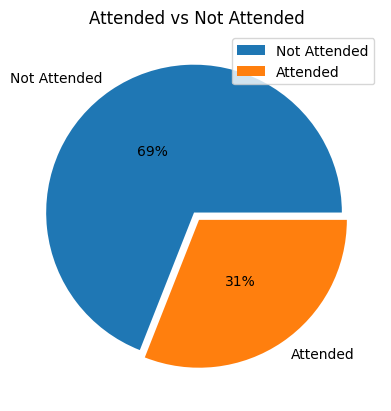

In [56]:
plt.pie(df.groupby('attended')['booking_id'].sum(), labels = ["Not Attended","Attended"], autopct='%.0f%%', pctdistance=0.5, explode=[0.03] * 2)
plt.title('Attended vs Not Attended')
plt.legend(labels = ['Not Attended', 'Attended'])
plt.show()

The vast majority of appointments are not attended.

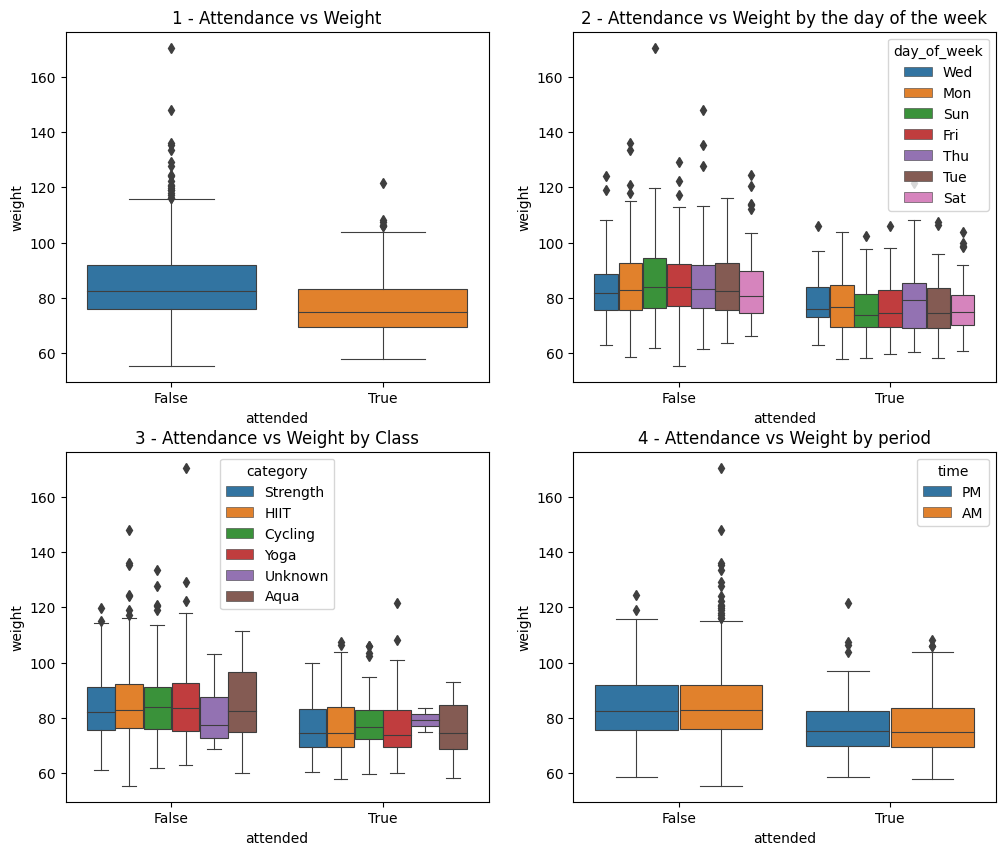

In [57]:
df['attended'] = df['attended'].astype('bool')

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(data=df, x='attended',y='weight', linewidth=0.8, ax=ax[0,0]).set(title='1 - Attendance vs Weight')
sns.boxplot(data=df, x='attended',y='weight', hue = 'day_of_week',linewidth=0.8, ax=ax[0,1]).set(title='2 - Attendance vs Weight by the day of the week')
sns.boxplot(data=df, x='attended',y='weight', hue = 'category',linewidth=0.8, ax=ax[1,0]).set(title='3 - Attendance vs Weight by Class')
sns.boxplot(data=df, x='attended',y='weight', hue = 'time',linewidth=0.8, ax=ax[1,1]).set(title='4 - Attendance vs Weight by period')

plt.show()

<b>Observations:</b>
<ul>
<li>1 - After analyzing the correlation between weight and attendance, it was observed that individuals with lower weight tend to have a higher likelihood of attending a scheduled session. This could be due to regular gym sessions resulting in lower weight.</li>
<li>2 - When examining the relationship between weight and attendance based on the day of the week, a significant imbalance in the observations was observed with several outliers.</li>
<li>3 - Similarly, when analyzing the relationship between weight and attendance according to class category, a significant imbalance in the observations was noticed.</li>
<li>4 - However, when investigating the relationship between weight and attendance based on the time of day, the imbalance in the observations was not as pronounced.</li>
</ul>

In [58]:
# Grouping by category, attendance and getting the weight mean
df.groupby(['category','attended'])[['weight']].mean()

weight
category attended           
Aqua     False     83.976682
         True      76.282800
Cycling  False     85.001284
         True      77.954643
HIIT     False     85.320336
         True      77.038785
Strength False     83.736847
         True      76.155645
Unknown  False     81.630000
         True      79.200000
Yoga     False     86.468925
         True      77.548810

We can strongly confirm that people who attends classes have lower weight.

## Task 3
### 3. Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.

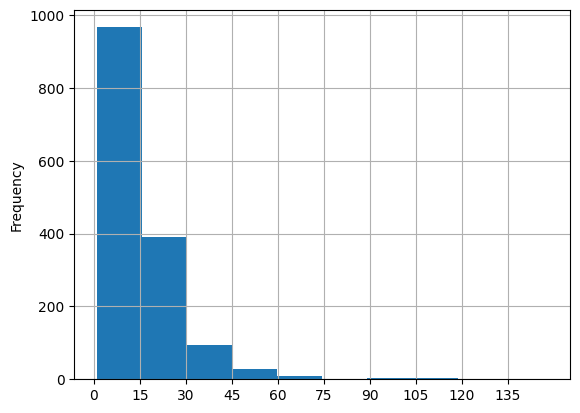

In [59]:
df['months_as_member'].plot(kind = 'hist')
plt.xticks(range(0, df['months_as_member'].max()+2, 15))
plt.grid(True)
plt.show()

Most people that frequents the classes are on their first months as a member in a right-skewed unimodal distribution.

## Task 4
### 4. Describe the relationship between attendance and number of months as a member. Your answer must include a visualization to demonstrate the relationship.

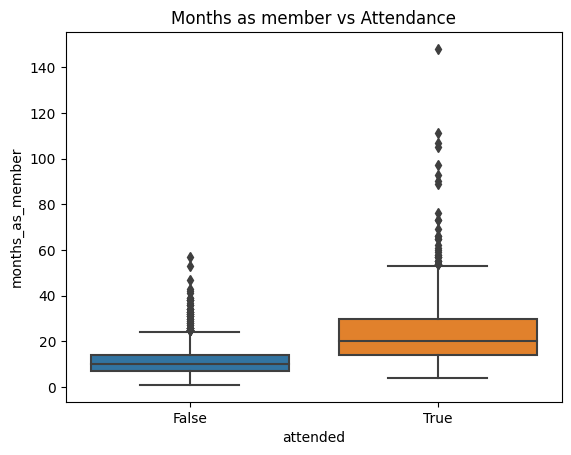

In [60]:
sns.boxplot(data=df, x='attended',y='months_as_member').set(title='Months as member vs Attendance');

After analyzing the correlation between the duration of membership and attendance, it was observed that individuals who have been members for a longer duration tend to have a higher likelihood of attending a scheduled session.

## Task 5
### 5. The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/clustering).

GoalZone intends to use the data to predict the attendance of members for booked sessions. This constitutes a <b>binary classification</b> problem, where the outcome can be either "attend" or "not attend" (1 or 0).

## Task 6
### 6. Fit a baseline model to predict whether members will attend using the data provided. You must include your code.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# "Encoding" Categorical Features
df = pd.get_dummies(df)

# Splitting the dataset into X and y
X = df.drop(["attended", "booking_id"], axis=1)
y = df["attended"]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Applying StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=29)
logreg.fit(X_train, y_train)

# Evaluating the model on the test set
accuracy = logreg.score(X_test, y_test)
print("Test set accuracy: {:.2f}%".format(accuracy * 100))

y_pred_LG = logreg.predict(X_test)

Test set accuracy: 76.33%


## Task 7
### 7. Fit a comparison model to predict whether members will attend using the data provided. You must include your code.

In [62]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=34)
rf.fit(X_train, y_train) #fitting the comparison model

accuracyRF = rf.score(X_test, y_test)

print("Test set accuracy: {:.2f}%".format(accuracyRF * 100))

y_pred_RF = rf.predict(X_test)

Test set accuracy: 73.00%


## Task 8
### 8. Explain why you chose the two models used in parts 6 and 7.

Logistic Regression is used as the main model because it's very simple and easy to use. <br/>
After modeling, Random Forest Classifier is used as comparision because it can provide the highest accuracy and handle variables fast.

## Task 9
### 9. Compare the performance of the two models used in parts 6 and 7, using any method suitable. You must include your code.

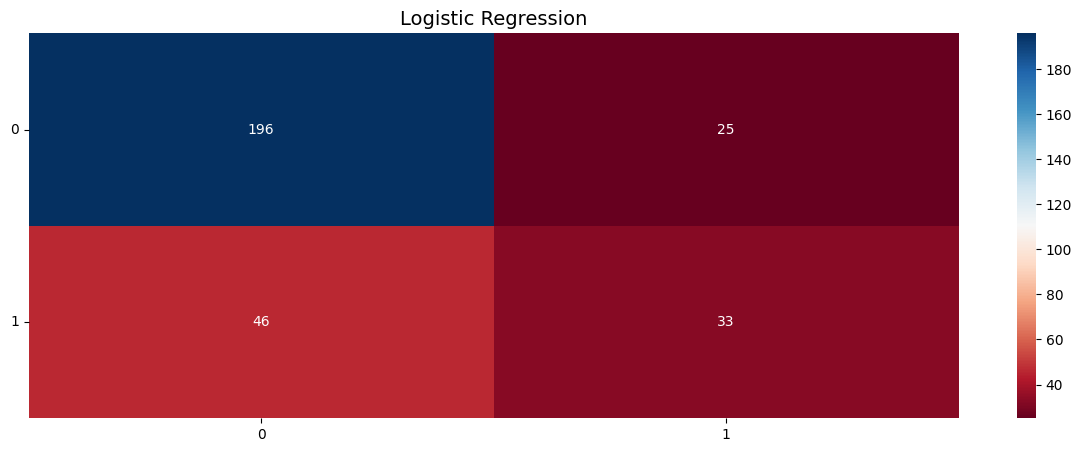

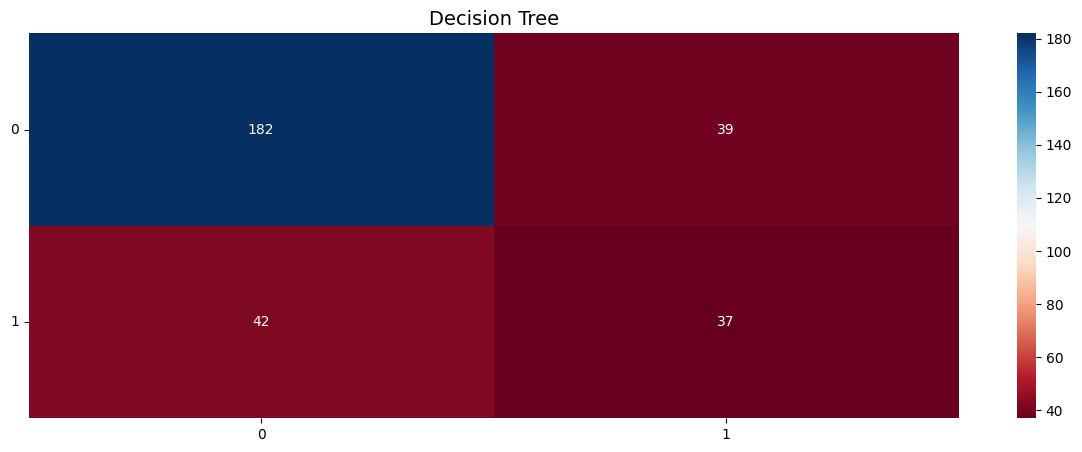

In [63]:
# Plotting Confusion Matrix with the models
from sklearn.metrics import confusion_matrix

con_logistic = confusion_matrix(y_test, y_pred_LG)
con_tree = confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(15,5))
sns.heatmap(con_logistic,annot=True,fmt="d",cmap='RdBu')
plt.title('Logistic Regression',fontsize=14)
plt.yticks(rotation =0)
plt.show()

plt.figure(figsize=(15,5))
sns.heatmap(con_tree,annot=True,fmt="d",cmap='RdBu')
plt.title('Decision Tree',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [64]:
# Comparing models
from sklearn.metrics import classification_report

print ('Logistic Regression:')
print(classification_report(y_test, y_pred_LG))
print("---" * 22)
print ('Random Forest:')
print(classification_report(y_test, y_pred_RF))

Logistic Regression:
              precision    recall  f1-score   support

       False       0.81      0.89      0.85       221
        True       0.57      0.42      0.48        79

    accuracy                           0.76       300
   macro avg       0.69      0.65      0.66       300
weighted avg       0.75      0.76      0.75       300

------------------------------------------------------------------
Random Forest:
              precision    recall  f1-score   support

       False       0.81      0.82      0.82       221
        True       0.49      0.47      0.48        79

    accuracy                           0.73       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.73      0.73      0.73       300



## Task 10
### 10. Explain which model performs better and why.

Based on the precision, recall, and F1-score values, the **logistic regression model** performed slightly better than the random forest model.

In the logistic regression model, the precision and recall values for the 'False' (Not Attended) class is relatively high which means that the model correctly predicted most of the cases where the outcome is 'False' with a high precision. The precision and recall for the 'True' (Attended) class is also relatively high and the f1-score is also relatively high which means that the precision and recall are balanced.

In the random forest model, the precision and recall values for the 'False' class is relatively high which means that the model correctly predicted most of the cases where the outcome is 'False' with a high precision. The precision and recall for the 'True' class is relatively low and the f1-score is also relatively low which means that the precision and recall are not balanced.

To improve the model's performance, we could try fine-tuning the hyperparameters of the logistic regression model to get better precision, recall and f1-score.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam